# **Questão 1 (a)**

A fim de resolver o problema por meio do método da bisseção, é necessário que seja obtido, das duas funções trajetoria, uma terceira função, sendo a raiz dessa $x$, a coordenada no eixo horizontal onde as duas funções se encontram.

Igualando ambas funções, se obtem: 

\begin{equation} 
-x^4 + 7.7x^3-18x^2+13.6x = -x^2+5x+0.75
\end{equation}

Obtendo-se, assim:

\begin{equation}
-x^4+7.7x^3-17x^2+8.6x-0.75 = 0
\end{equation}

Pela imagem fornecida pelo enunciado, 

**Método da bisseção**

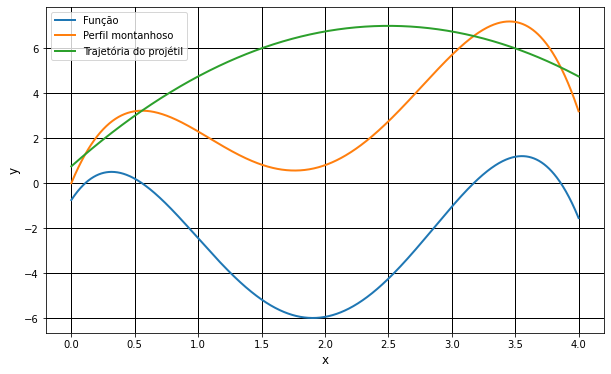

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


func = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x - 0.75
func1 = lambda x: -x**4 + 7.7*x**3-18*x**2+13.6*x
func2 = lambda x: -x**2+5*x+0.75
xi = np.linspace(0, 4, num=1001, endpoint=True)
yi = func(xi)
yi1 = func1(xi)
yi2 = func2(xi)
plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(xi,yi,label = 'Função',linewidth = 2)
plt.plot(xi,yi1,label = 'Perfil montanhoso',linewidth = 2)
plt.plot(xi,yi2,label = 'Trajetória do projétil',linewidth = 2)
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.show()

Naturalmente, como há 4 pontos de intersecção entre as funções fornecidas, o polinômio resultante possui 4 raízes. Como se quer obter a altura máxima a qual o impacto ocorre, a raíz de interesse está no intervalo $3 \leq x \leq 3.5$.

In [ ]:
#Importe de bibliotecas

import numpy as np
import math
import matplotlib.pyplot as plt

#Definição de parâmetros 

func = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x - 0.75
func2 = lambda x: -x**2+5*x+0.75
a = 3
b = 3.5
tol = 10**(-3)
kmax = 5

# Definição do método da bisseção

def bissecaok(func,a,b,tol,kmax):
    x0 = (a+b)/2
    k = 0
    x = x0; erro = np.inf;
    while(erro > tol and k < kmax):
        k = k + 1;
        if(func(a)*func(x) < 0):
          b = x;
        else:
          a = x;
        x0 = x;
        x = (a+b)/2;
        erro = abs(x-x0);
        #print('k = %d; x = %.6f' %(k,x))

#Parametros para impressão

    y = func2(x)

#Impressão das coordenadas

    print('Coordenadas do ponto de impacto: (%.6f,%.6f)' %(x,y))
    print('\n')

#Parâmetros para plot

    xi = np.linspace(0, 4, num=1001, endpoint=True)
    yi = func(xi)
    yi1 = func1(xi)
    yi2 = func2(xi)
    plt.figure(figsize=(10,6),facecolor='white')
    plt.grid(color='k', linestyle='-', linewidth=1)
#   plt.plot(xi,yi,label = 'Função',linewidth = 2)
    plt.plot(xi,yi1,label = 'Perfil montanhoso',linewidth = 2)
    plt.plot(xi,yi2,label = 'Trajetória do projétil',linewidth = 2)
    plt.scatter(x,y,label = 'Ponto de impacto',linewidth = 2, color = 'r')
    plt.xlabel('x',fontsize='large') 
    plt.ylabel('y',fontsize='large') 
    plt.title('') 
    plt.legend() 
    plt.show()
    #return x

bissecaok(func,a,b,tol,kmax)


Coordenadas do ponto de impacto: (3.179688,6.538025)




NameError: ignored

# **Questão 1 (b)**

Por sua vez, pode-se definir duas funções de $R^{2}$ de forma que sua imagem também esteja em $R^{2}$ como:

\begin{equation}
F(x,y) = (f_{1}(x, y),f_{2}(x,y))^{T}
\end{equation}

Onde as funções $f_{1}(x,y)$ e $f_{2}(x,y)$ são definidas como:

\begin{equation}
f_{1}(x,y) = -x^4+7.7x^3 - 18x^2 + 13.6x -y = 0
\end{equation}

e, também:

\begin{equation}
f_{1}(x,y) =-x^2+5x+0,75-y = 0
\end{equation}

O que permite aplicar o método de newtom para sistemas lineares, onde tem-se o sistema:

\begin{equation}
 \left \{ \begin{matrix} -x^4+7.7x^3 - 18x^2 + 13.6x -y = 0\\ -x^2+5x+0,75-y = 0 \end{matrix} \right.\end{equation}

e, consequentemente
\begin{equation}
F(x,y) = (f_{1}(x, y),f_{2}(x,y))^{T}=(0,0)^{T}
\end{equation}
Assim, aplicando-se o algoritmo.


In [ ]:
# Definindo a função vetorial F
# Definindo a função vetorial 
import numpy as np
import math

f1 = lambda x: -1*x[0]**4 + 7.7*x[0]**3 - 18*x[0]**2 + 13.6*x[0] - x[1]
f2 = lambda x: -1*x[0]**2 + 5*x[0] + 0.75 - x[1]
F = lambda x: np.array([f1(x),f2(x)])

# Definindo a função matricial Jac
jac11 = lambda x: -4*x[0]**3 + 23.1*x[0]**2 - 36*x[0] +13.6
jac12 = lambda x: -1;
jac21 = lambda x: -2*x[0] + 5;
jac22 = lambda x: -1;
Jac = lambda x: np.array([[jac11(x),jac12(x)],[jac21(x),jac22(x)]])

# chute inicial, próximo do ponto máximo

x0 = [3,6];

def newton_sis(F,Jac,x,tol,kmax):
    erro = np.inf; k = 0;
    while(erro > tol and k < kmax):
        k = k+1;
        v = np.linalg.solve(Jac(x),F(x));
        x = x-v;
        erro = np.linalg.norm(v);
    print('Coordenadas do ponto de impacto: (%.3f,%.3f)' %(x[0],x[1]))   
    return x,k

(x,k) = newton_sis(F,Jac,x0,10**-3,1000)



Coordenadas do ponto de impacto: (3.173,6.547)


# **Questão 2 (a)**


As interpolações polinomiais consistem em, através de um conjunto de $n+1$ dados $A$ $=$ $\{(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{i},y_{i}),...,(x_{n+1},y_{n+1})\}$, obter um polinômio $P_{n}(x)$ (chamado de polinômio interpolante) de grau $n$, de tal forma que:

\begin{equation}
P_{n}(x_{i}) = y_{i}
\end{equation}

Com o polinomio obtido através de diferentes métodos, neste caso através do método de Lagrande e pelo método de Newton, se obtém uma função contínua que contempla os pontos fornecidos, sendo assim, uma poderosa estratégia para descrever aproximações de curvas tendo como base dados pontuais da mesma, sendo esses chamados de nós da interpolação.

Para um dado conjunto de dados, pelo teorema visto em aula, o seu polinômio interpolante é único, o que é verificado facilmente, visto que para cada $x_{i}$, há apenas uma correspondência $y_{i}$, de forma que:

\begin{equation}
a_{0} + a_{1}x_{i} + a_{2}x_{i}^2 + a_{3}x_{i}^{3} + ...+ a_{n}x_{i}^{n} = y_{i}
\end{equation}

Sendo os coeficientes $a_{k}$ os únicos parâmetros a serem determinados. Portanto, para os $(n+1)$ dados, tem-se a linha de um sistema linear, cuja solução é única, visto que o determinante da matriz do sistema (que é da forma da matriz de Vandermonde) é dado por:

\begin{equation}
det(\textbf{A}) = \prod_{i<k}^{n}(x_{k}-x_{i}) \neq 0
\end{equation}

Visto que $x_{k} \neq x_{i}$.

Os métodos de Newton e Lagrange consistem em simplificar o cálculo dos coeficientes do polinômio interpolador, de modo a evitar a solução de um sistema com $n+1$ incógnitas. 

O método de Lagrande consiste em obter um polinômio da seguinte forma:

\begin{equation}
P_{n}(x) = y_{0}l_{0}(x) + y_{1}l_{1}(x) +...+ y_{n}l_{n}(x)
\end{equation}

Onde os termos $l_{k}(x)$ são obtidos da seguinte forma:

\begin{equation}
l_{k}(x) = \prod_{i<k, i \neq k}^{n}\frac{x-x_{i}}{x_{k}-x_{i}}
\end{equation}

Para $k = 0,1,2,...n$

Os termos $l_{k}(x)$ (que são polinômios), tem como suas raízes todo o $x_{i}$ que $x_{i} \neq x_{k}$, e assume valor $1$ para  $x_{i} = x_{k}$, ou seja, o polinômio contempla os pontos fonecidos, visto que seus termos são nulos para qualquer $x_{i}$ que esteja no conjunto de dados, com exceção de um deles, que assumirá valor $1$ e que está multiplicado por $y_{i}$, par correspondente de $x_{i}$ em questão.

Abaixo, tem-se o algoritmo para a interpolação pelo método de Lagrange dos pontos fornecidos pelo enunciado.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interp(xi,yi,x):
    n = np.size(xi); # maior dimensão de um vetor unidimensional
    m = np.size(x); # maior dimensão de um vetor unidimensional
    L = np.ones((n,m));
    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j]);
    y = yi.dot(L); # --> yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y;


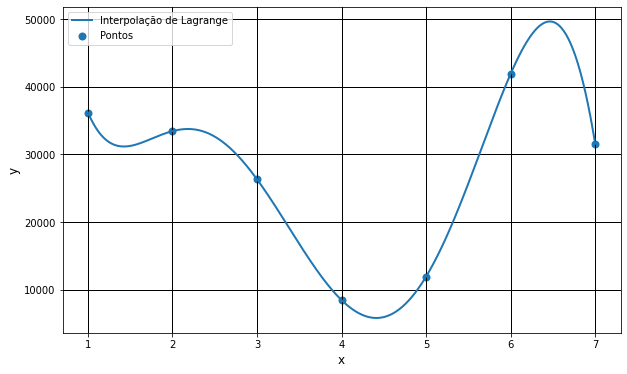

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.array([1,2,3,4,5,6,7], dtype='double');
yi = np.array([36175,33431,26310,8456,11946,41916,31553], dtype='double');

x = np.linspace(1, 7, num=1001, endpoint=True)

y_la = lagrange_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x,y_la,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.show()

Por sua vez, o método de Newton se baseia na seguinte expressão para o polinômio interpolador.

\begin{equation}
P_{n}(x) = \alpha_{0} + \alpha_{1}(x-x_{0}) + \alpha_{2}(x-x_{0})(x-x_{1}) + ... + \alpha_{n}(x-x_{0})(x-x_{1})...(x-x_{n-1})
\end{equation}

Onde os parâmetros do polinômio devem satisfazer o seguinte sistema:


\begin{equation}
\left \{ 
\begin{matrix} 
\alpha_{0} = y_{0} \\ 
\alpha_{0} + \alpha_{1}(x_{1} - x_{0}) = y_{1} \\
\alpha_{0} + \alpha_{1}(x_{2} - x_{0}) + \alpha_{2}(x_{2} - x_{0})(x_{2} - x_{1}) = y_{2} \\
\downarrow \\
\alpha_{0} + \alpha_{1}(x_{n} - x_{0}) + ... + \alpha_{n}(x_{n} - x_{0})...(x_{n} - x_{n-1}) = y_{n} 
\end{matrix} 
\right.
\end{equation}

Observe que cada linha do sistema, não depende de sua antecessora e, portanto, é possível incluir dados adicionais para a interpolação sem que seja necessário recalcular-se todos os coeficientes $\alpha$s anteriores.

De forma a calcular esses coeficientes de forma mais prática, emprega-se o conceito de diferença dividida e, portanto, o termo geral é:

\begin{equation}
\alpha_{k} = f[x_{0},x_{1},...,x_{k}]
\end{equation}

Para $k = \{0,1,2,...,n\}$

Onde a mesma é calculada por:

\begin{equation}
f[x_{i},x_{i+1},...,x_{i+k}] = \frac{f[x_{i+1},x_{i+2},...,x_{i+k}] - f[x_{i},x_{i+1},...,x_{i+k-1}]}{x_{i+k}-x_{i}}
\end{equation}

Onde $k = \{0,1,2,...,n\}$ e $i = \{0,1,2,...,n-k\}$.

De forma que, para os temos iniciais do processo, tem-se simplesmente:

\begin{equation}
f[x_{i}] = y_{i}
\end{equation}

Observa-se que este é um processo recursivo, de modo que, os termos iniciais do processo são simplesmente os termos correspondentes $y_{i}$ e, portanto, pode-se calcular os termos sequentes.

In [ ]:
def newton_interp(xi,yi,x):
    n = np.size(xi); ni = np.size(x); N = np.ones((n,ni));
    D = np.zeros((n,n)); D[:,0] = yi;
    
    for j in np.arange(n-1): # matriz de diferenças divididas
        for i in np.arange(n-j-1):
            D[i,j+1] = (D[i+1,j]-D[i,j])/(xi[i+j+1]-xi[i]);

    for i in np.arange(1,n): # loop do produtório da forma de Newton
        N[i,:] = N[i-1,:]*(x-xi[i-1]);
    
    y = D[0,:].dot(N)
    return y;

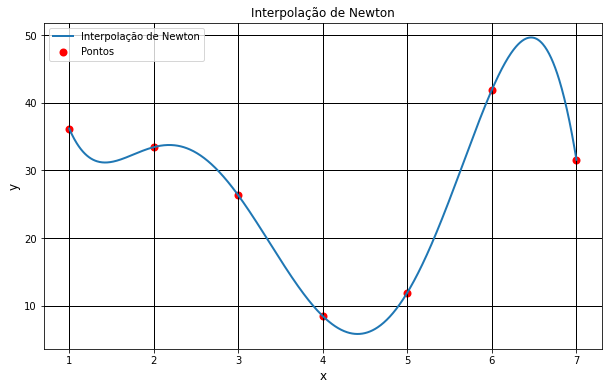

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi = np.array([1,2,3,4,5,6,7], dtype='double');
yi = np.array([36.175,33.431,26.310,8.456,11.946,41.916,31.553], dtype='double');
x = np.linspace(1, 7, num=1001, endpoint=True)

y_ne = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x,y_ne,label = 'Interpolação de Newton',linewidth = 2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2, facecolor='red') 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Interpolação de Newton') 
plt.legend() 
plt.show()



A fim de se obter a expressão do polinômio interpolante, empresa-se a resolução do sistema definido pela matriz de Vandermonde $(A)$, matriz de coeficientes do polinômio $(a_{0},a_{1},a_{2},...,a_{n})$ e pela matriz $(b)$ que contém os dados da imagem $y_{i}$, portanto, tem-se:
\begin{equation}
\left(\begin{array}{ccccc}
1 & x_{0} & x_{0}^2 & ... & x_{0}^{n}\\
1 & x_{1} & x_{1}^2 & ... & x_{1}^{n}\\
\vdots & \vdots & \ddots & \vdots  \\
1 & x_{n} & x_{n}^2 & ... & x_{n}^{n}\\
\end{array}\right) 
\left(\begin{array}{ccccc}
a_{0} \\
a_{1} \\
\vdots \\
a_{n} \\
\end{array}\right) = 
\left(\begin{array}{ccccc}
y_{0} \\
y_{1} \\
\vdots \\
y_{n} \\
\end{array}\right)
\end{equation}

Resolvendo através do algoritmo abaixo, tem-se:



In [ ]:
def vandermonde(xi,yi):
    n = np.size(xi)
    A = np.ones((n,n), dtype=np.float64)
    for i in range(0,n,1):
        for j in range(0,n,1):
            A[i,j] = xi[i]**(j)

    x = np.linalg.solve(A,yi)
    print(x)

In [ ]:
import numpy as np
from scipy import linalg as lin
xi = np.array([1,2,3,4,5,6,7], dtype='double');
yi = np.array([36175,33431,26310,8456,11946,41916,31553], dtype='double');

vandermonde(xi,yi)


[ 1.65071000e+05 -2.87067250e+05  2.28728519e+05 -8.41699583e+04
  1.47231944e+04 -1.13879167e+03  2.82861111e+01]


Portanto, ordenando os coeficientes obtidos tem-se o polinômio interpolador como:

\begin{equation}
165071 - 287067.25x + 228728.519x^2 - 84169.958x^3 + 14723.194x^4 - 1138.791x^5 + 28.286x^6
\end{equation}

Onde que por questões estéticas, se representa o polinômio com 4 algarismos significativos.

Observa-se que as três curvas obtidas coincidem umas com as outras resultado em apenas uma curva visível.


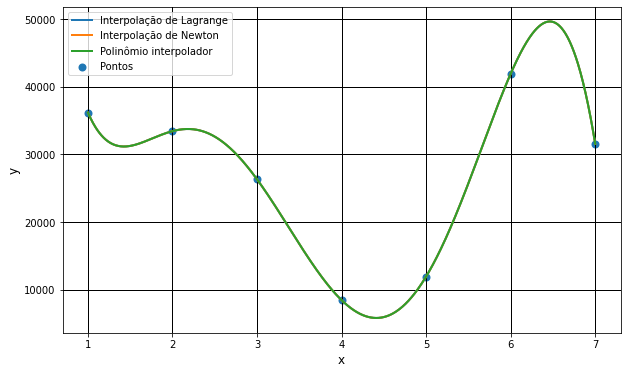

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda x: 165071 - ((287067.25)*x) + ((228728.519)*x**(2)) - ((84169.958)*x**(3)) + ((14723.194)*x**(4)) - ((1138.791)*x**(5)) + ((28.286)*x**6)

xi = np.array([1,2,3,4,5,6,7], dtype='double');
yi = np.array([36175,33431,26310,8456,11946,41916,31553], dtype='double');

x = np.linspace(1, 7, num=1001, endpoint=True)

y_la = lagrange_interp(xi,yi,x)
y_ne = newton_interp(xi,yi,x)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x,y_la,label = 'Interpolação de Lagrange',linewidth = 2)
plt.plot(x,y_ne,label = 'Interpolação de Newton',linewidth = 2)
plt.plot(x,func(x),label = 'Polinômio interpolador',linewidth = 2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 2) 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('') 
plt.legend() 
plt.show()

# **Questão 2 (b)**

Com a adição de dados de mais 4 dias, tem-se as seguintes representações do polinômio interpolador.



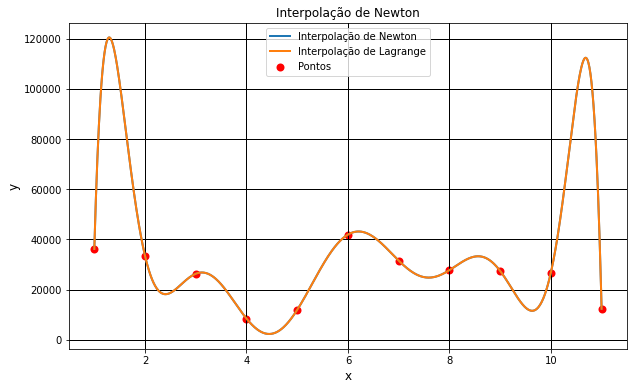

In [ ]:
import numpy as np
from scipy import linalg as lin

xi1 = np.array([1,2,3,4,5,6,7,8,9,10,11], dtype='double');
yi1 = np.array([36175,33431,26310,8456,11946,41916,31553,27750,27444,26749,12342], dtype='double');

x1 = np.linspace(1, 11, num=1001, endpoint=True)

y_la1 = lagrange_interp(xi1,yi1,x1)
y_ne1 = newton_interp(xi1,yi1,x1)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x1,y_ne1,label = 'Interpolação de Newton',linewidth = 2)
plt.plot(x1,y_la1,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(xi1,yi1,label = 'Pontos',linewidth = 2, facecolor='red') 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Interpolação de Newton') 
plt.legend() 
plt.show()


De modo que a espressão do polinômio interpolador obtida numéricamente é

In [ ]:
import numpy as np
from scipy import linalg as lin

xi1 = np.array([1,2,3,4,5,6,7,8,9,10,11], dtype='double');
yi1 = np.array([36175,33431,26310,8456,11946,41916,31553,27750,27444,26749,12342], dtype='double');

vandermonde(xi1,yi1)

[-6.67498700e+06  1.93164892e+07 -2.26109174e+07  1.44251834e+07
 -5.62023766e+06  1.40937664e+06 -2.32037390e+05  2.49221944e+04
 -1.68046814e+03  6.45433794e+01 -1.07669615e+00]


Portanto, tem-se como polinômio interpolador:

\begin{equation}
-6674987 + 19316489.2x - 22610917.4x^2 + 14425183.4x^3 - 5620237.66x^4 + 1409376.64x^5 - 232037.39x^6 + 24922.194x^7 - 1680.468x^8 + 64.543x^9 - 1.076x^{10}
\end{equation}

Comparando os resultados obtidos, tem-se.

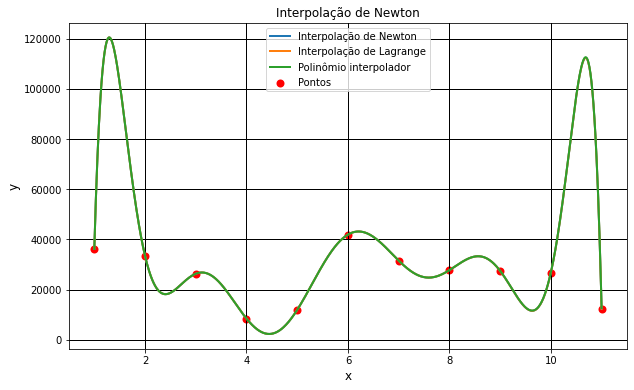

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xi1 = np.array([1,2,3,4,5,6,7,8,9,10,11], dtype='double');
yi1 = np.array([36175,33431,26310,8456,11946,41916,31553,27750,27444,26749,12342], dtype='double');

x1 = np.linspace(1, 11, num=1001, endpoint=True)

func1 = lambda x: - 6.67498700e+06 + (1.93164892e+07*x) - (2.26109174e+07*(x**2)) + (1.44251834e+07*(x**3)) - (5.62023766e+06*(x**4)) + (1.40937664e+06*(x**5)) - (2.32037390e+05*(x**6)) + (2.49221944e+04*(x**7)) - (1.68046814e+03*(x**8)) + (6.45433794e+01*(x**9)) - (1.07669615e+00*(x**10))

y_la1 = lagrange_interp(xi1,yi1,x1)
y_ne1 = newton_interp(xi1,yi1,x1)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x1,y_ne1,label = 'Interpolação de Newton',linewidth = 2)
plt.plot(x1,y_la1,label = 'Interpolação de Lagrange',linewidth = 2)
plt.plot(x1,func1(x1),label = 'Polinômio interpolador',linewidth = 2)
plt.scatter(xi1,yi1,label = 'Pontos',linewidth = 2, facecolor='red') 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Interpolação de Newton') 
plt.legend() 
plt.show()

Observa-se, contudo que utilizar-se do método de Newton para contextos onde novos dados são possiveis de serem adicionados é mais vantajoso do que usar o método de Lagrange, justamente porque o segundo utiliza-se de um processo (produtório) que utiliza de todo o conjunto (com exceção do dado relativo ao próprio termo $k$) e, portanto, a adição de mais pontos torna todo o processo anterior inválido e, assim, é necessário fazer todos os cálculos dos termos $l_{k}(x)$ novamente. Contudo, tal dependencia não ocorre sobre o método de Newton, visto que, pelo sistema contido na seção sobre o método de Newton, a adição de mais dados não altera o cálculo de $\alpha$s anteriores, resultando apenas na adição de mais uma linha do sistema e um $\alpha$ e seu polinômio multiplicativo.



# **Questão 3 (a)**

Com base nos dados fornecidos, emprega-se o algoritmo sobre o método de Lagrange.

21
21


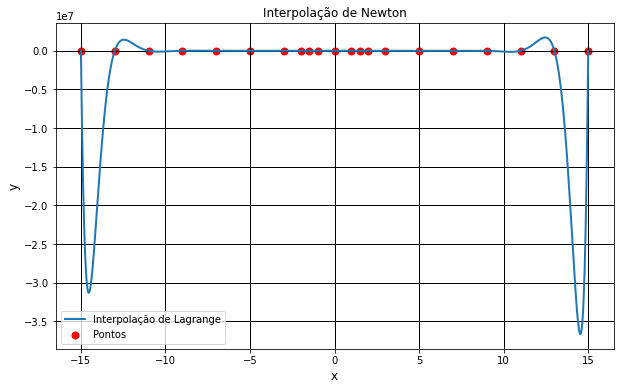

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


xi2 = np.array([-15,-13,-11,-9,-7,-5,-3,-2,-1.5,-1, 0,1.5, 1, 2, 3, 5, 7, 9,11,13,15], dtype='double');
yi2 = np.array([ 10, 11, 12,13,14,15,16,26, 28, 29,30, 29,28,26,16,15,14,13,12,11,10], dtype='double');

n1 = np.size(xi2)
n2 = np.size(yi2)
print(n1)
print(n2)
x2 = np.linspace(-15, 15, num=1001, endpoint=True)

y_la2 = lagrange_interp(xi2,yi2,x2)

plt.figure(figsize=(10,6),facecolor='white')
plt.grid(color='k', linestyle='-', linewidth=1)
plt.plot(x2,y_la2,label = 'Interpolação de Lagrange',linewidth = 2)
plt.scatter(xi2,yi2,label = 'Pontos',linewidth = 2, facecolor='red') 
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Interpolação de Newton') 
plt.legend() 
plt.show()




Observa-se que a figura obtida não se parece em nada com vista superior da aeronave, devido principalmente ao erro associado aos intervalos $-15 < x < -10$ e $10 < x < 15$, um ótimo exemplo do fenômeno de Runge.

Como 21 dados são fornecidos para a interpolação, é esperado que um grande erro seja verificado, visto a instabilidade que polinômios de graus maiores que 3 adquirem gradualmente, aumentando-se o erro da interpolação.

Para a spline linear, temos então:


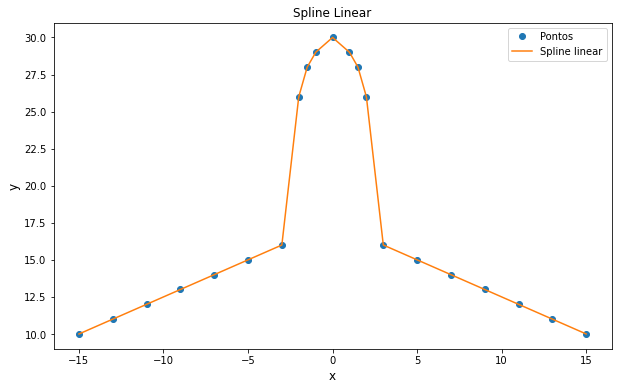

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d 

xi2 = np.array([-15,-13,-11,-9,-7,-5,-3,-2,-1.5,-1, 0,1,1.5, 2, 3, 5, 7, 9,11,13,15], dtype='double');
yi2 = np.array([ 10, 11, 12,13,14,15,16,26, 28, 29,30, 29,28,26,16,15,14,13,12,11,10], dtype='double');

f = interp1d(xi2, yi2)

xnew = np.linspace(-15, 15, num=1001, endpoint=True)

plt.figure(figsize=(10,6),facecolor='white')
plt.plot(xi2, yi2, 'o', xnew, f(xnew), '-')
plt.legend(['Pontos', 'Spline linear'], loc='best')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Spline Linear') 
plt.show()

Verifica-se pelo resultado anterior que splines se tornam uma solução mais adequada para a interpolação de um considerável número de pontos.

Apesar de haver bicos em alguns pontos da figura, temos uma interpolação muito mais aceitável através da spline linear em comparação com o método de Lagrange.

# **Questão 4 (a)**

O método dos gradientes consiste em resolver um sistema linear usando-se de um problema de minimização de uma função quadrática $F(\textbf{x}): R^{n} \rightarrow R$, sendo $F$ expressa abaixo:

\begin{equation}
F(\textbf{x}) = \frac{1}{2}\textbf{x}^TA\textbf{x} - b^T\textbf{x} + c
\end{equation}

Onde $A$ é, necessariamente, uma matriz simétrica positiva, ou seja: $\textbf{x}^TA\textbf{x}>0$.

Para a função acima, tem-se que seu ponto de mínimo $\textbf{x}$ coincide com a solução do sistema linear:

\begin{equation}
A\textbf{x} = b
\end{equation}

A verificação desse fato pode ser feita através de ferramentas do cálculo, de modo que o gradiente da função $F(x)$ deve ser um vetor nulo e o determinante da matriz Hessiana deve ser positivo.

Antes de se aplicar o gradiente sobre a função, observa-se que, devido as operações matriciais, os elementos da imagem de $F(\textvf{x})$ (escalares) são dados por:

\begin{equation}
f(\textbf{x}) = \frac{1}{2} \sum_{i,j=1}^{n}a_{ij}x_{i}x_{j} - \sum_{i = 1}^{n}b_{i}x_{i} + c
\end{equation}

E, portanto, tem-se como gradiente:

\begin{equation}
\nabla f(x) = 
 \left[ \begin{matrix} \dfrac{\partial f(x)}{\partial x_{1}} \\ 
 \dfrac{\partial f(x)}{\partial x_{2}} \\
 \vdots \\
 \dfrac{\partial f(x)}{\partial x_{n}} \\ 
 \end{matrix} \right] =   
 \left[ \begin{matrix} a_{11}x_{1} + a_{12}x_{2} + ... + a_{1n}x_{n} - b_{1}\\ 
 a_{21}x_{1} + a_{22}x_{2} + ... + a_{2n}x_{n} - b_{2} \\
 \vdots \\
 a_{n1}x_{1} + a_{n2}x_{2} + ... + a_{nn}x_{n} - b_{n} \\ 
 \end{matrix} \right] = 
A\textbf{x} - b = 
 \left[ \begin{matrix} 0 \\ 
 0 \\
 \vdots \\
 0 \\ 
 \end{matrix} \right]
\end{equation}

Ou seja, $textbf{x}$ é ponto crítico. Porém ainda é necessário verificar se é ponto mínimo. Dessa forma, obtém-se a matriz Hessiana:

\begin{equation}
| \mathbf{H} |= 
\left|\begin{array}{cccc}
\dfrac{\partial^2 f(x)}{\partial x_{1}^2} & \dfrac{\partial^2 f(x)}{\partial x_{1}x_{2}} & ... & \dfrac{\partial^{2} f(x)}{\partial x_{1}x_{n}}\\
\dfrac{\partial^2 f(x)}{\partial x_{2}x_{1}} & \dfrac{\partial^2 f(x)}{\partial x_{2}^2} & ... & \dfrac{\partial^{2} f(x)}{\partial x_{2}x_{n}}\\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2 f(x)}{\partial x_{n}x_{1}} & \dfrac{\partial^2 f(x)}{\partial x_{n}x_{2}} & ... & \dfrac{\partial^{2} f(x)}{\partial x_{n}^2}\\
\end{array}\right| = 
\left|\begin{array}{cccc}
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & ... & a_{nn}\\
\end{array}\right| = 
|A|
\end{equation}

Como $|A|$ é simétrica positiva, temos que $|A| > 0$ e, portanto $\textbf{x}$ é ponto de mínimo.

O processo iterativo tem como objetivo obter $\nabla F(\textbf{x}) = 0$. Como se quer atingir o mínimo da função, segue-se o sentido de maior decrescimento da função, de forma que define-se o resíduo do processo:

\begin{equation}
- \nabla F(x) = b - A\textbf{x}^{k}= r^{k}
\end{equation}

De modo que $x^{k+1}$ é obtido como:

\begin{equation}
x^{k+1} = x_{k} - \alpha \nabla F(x^{k}) = x^{k} + \alpha r^{k}
\end{equation}

E, por sua vez, o parâmetro $\alpha$ é dado por:

\begin{equation}
\alpha = \frac{r^{k}.r^{k}}{r^{k}.Ar^{k}}
\end{equation}

Da própria expressão anterior, é possível concluir que resíduos resultantes de iterações consecultivas são perpendiculares, ou seja $r^{k+1}.r^{k} = 0$.



# **Questão 4 (b)**

Escolhendo-se uma matriz de ordem três por três simétrica positiva definida, tem-se:
\begin{equation}
A = 
\left(\begin{array}{ccc}
10 & 1 & 0 \\
1 & 10 & 1 \\
0 & 1 & 10 \\
\end{array}\right)
\end{equation}

A fim de verificar se essa matriz é SPD, nota-se fácilmente que é simétrica e, portanto, verifica-se se os determinantes principais da matriz são positivos:

\begin{equation}
\left|\begin{array}{cc}
10 
\end{array}\right| > 0
\end{equation}

\begin{equation}
\left|\begin{array}{ccc}
10 & 1 \\
1 & 10 
\end{array}\right|=99>0
\end{equation}

e, finalmente:
\begin{equation}
\left|\begin{array}{ccc}
10 & 1 & 0 \\
1 & 10 & 1 \\
0 & 1 & 10 
\end{array}\right| = 80 > 0
\end{equation}

A matriz é SPD. Em seguida, define-se $b$ como:

\begin{equation} 
\mathbf{b} = 
\left(\begin{array}{c}
11\\
11 \\
1 
\end{array}\right)
\end{equation}

Adotando o resíduo como critério de parada, tem-se o algoritmo para o método dos gradientes.



In [ ]:
import numpy as np
from numpy import linalg as LA

def is_pos_def(x):
    """verifique se uma matriz é simétrica positiva definida"""
    return np.all(np.linalg.eigvals(x) > 0)

def metodos_dos_gradientes(A, b, x, kmax):
    """
    Resolve Ax = b
    Parametro x: Valores inciais
    """
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('A matriz A precisa ser simétrica positiva definida(SPD)')
    r = b - A @ x
    k = 0; erro = np.inf;
    while (erro > 1e-5 and k < kmax):
        p = r
        q = A @ p
        alpha = (p @ r) / (p @ q)
        x = x + alpha * p
        r = r - alpha * q
        k = k + 1
        erro = LA.norm(r)
        print('Iteração: %.d | Norma do erro: %.6f | x: ' %(k,erro))        
        print(x); print('\n')
    return x

In [ ]:
A = np.array([[10,1,0], [1,10,1],[0,1,10]])
b = np.array([11,11,1])
x0 = np.array([0,0,0])
kmax = 1000
# Agora, chamamos a nossa função: metodos_dos_gradientes(A,b,xo)!
metodos_dos_gradientes(A, b, x0, kmax)

Iteração: 1 | Norma do erro: 0.898322 | x: 
[0.9922049  0.9922049  0.09020045]


Iteração: 2 | Norma do erro: 0.080773 | x: 
[1.00077186e+00 9.91759863e-01 8.59247324e-04]


Iteração: 3 | Norma do erro: 0.011418 | x: 
[1.00082399e+00 9.99833507e-01 8.24028484e-04]


Iteração: 4 | Norma do erro: 0.001615 | x: 
[1.00001631e+00 9.99835199e-01 1.63109850e-05]


Iteração: 5 | Norma do erro: 0.000228 | x: 
[1.00001648e+00 9.99996670e-01 1.64800622e-05]


Iteração: 6 | Norma do erro: 0.000032 | x: 
[1.00000033e+00 9.99996704e-01 3.26217049e-07]


Iteração: 7 | Norma do erro: 0.000005 | x: 
[1.00000033e+00 9.99999933e-01 3.29598411e-07]




array([1.00000033e+00, 9.99999933e-01, 3.29598411e-07])

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('P1_2.ipynb')